In [2]:
from astropy import table
import numpy as  np
from astropy.table import Table
import matplotlib.pyplot as plt
from astropy.io import ascii
import pylab as py
import zipfile
from astropy.stats import LombScargle
import os
import os.path
import scipy
import statistics
from scipy.optimize import curve_fit
import scipy.optimize as optimization

%matplotlib inline

In [3]:
imported_macho_lightcurves = os.listdir("for_tara")
macho_data = []

for curve in imported_macho_lightcurves:
    with open(os.path.join("for_tara", curve), "r") as src_file:
        data = src_file.read()
        macho_data.append(data) 

# IDENTIFIED QUASARS

# QUASAR 1  9.4641.568 -- macho_data[2594] (36 sigma off)
# QUASAR 2  9.4882.332 -- macho_data[4523] (54 sigma off)
# QUASAR 3  13.6805.324 -- macho_data[1050] (33 sigma off)
# QUASAR 4  1.4537.1642 -- macho_data[510] (21 sigma off)

In [4]:
# get rid of periodical graphs
#for each light curve
#     read data
#    remove things that don't vary -- calculate chi squared -- best stright line (chi square low value), rms 
#    is it periodic?
#        LombScargle -- 
#        not periodic and varying: Quasar
#   
#    LombScargle
#
#    i period strong?
#  more variable or less than a certain magnitude -- less than small number and more than 1
#  calculate stand dev
#  within errors doesn't vary
#  rms -- look up (chi squared greater than 1 is variable)
#  star not varying as opposed to varying 
len(macho_data)

4789

plotting folded periods for each light curve

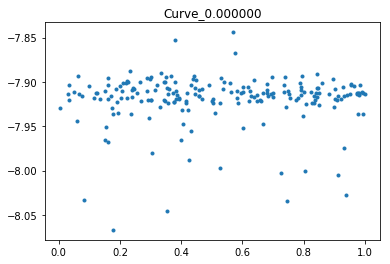

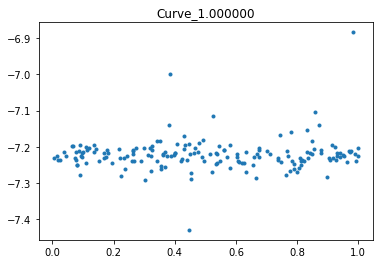

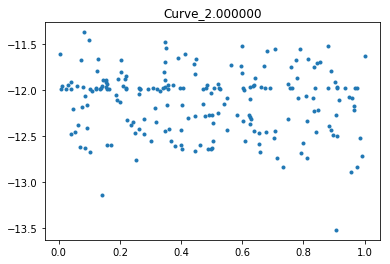

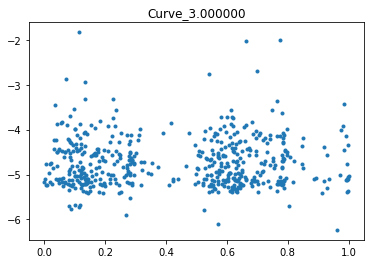

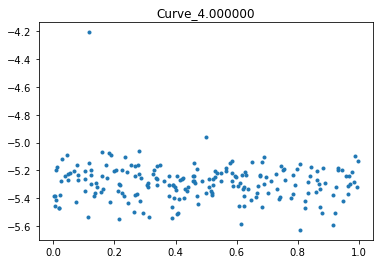

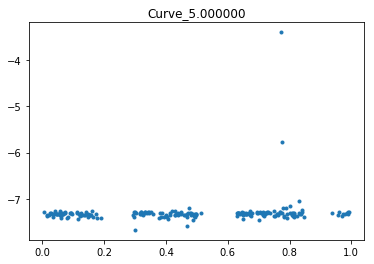

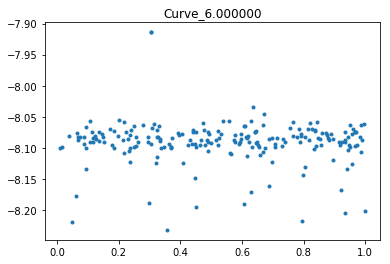

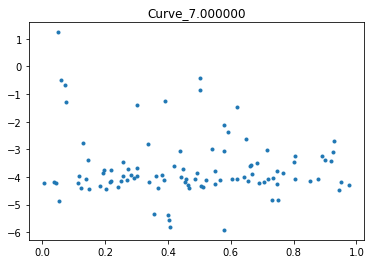

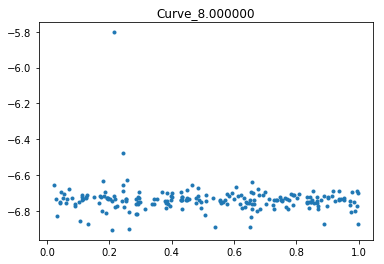

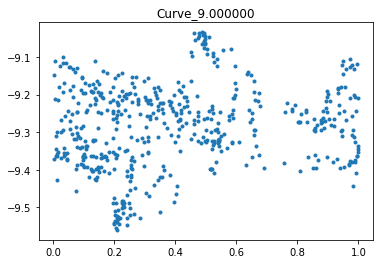

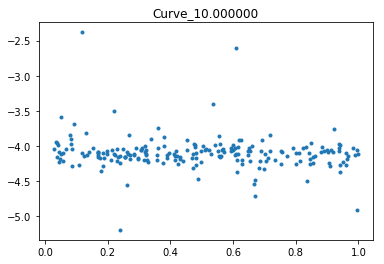

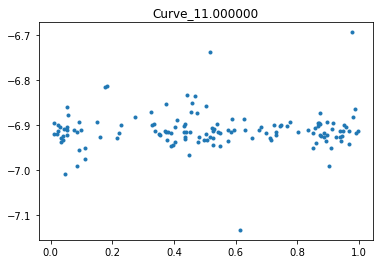

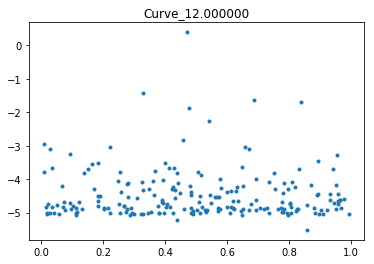

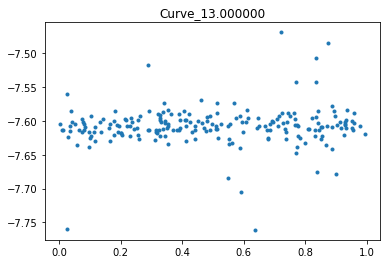

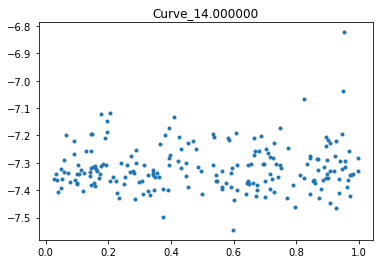

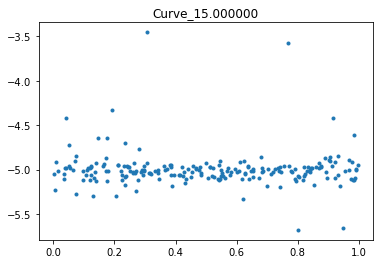

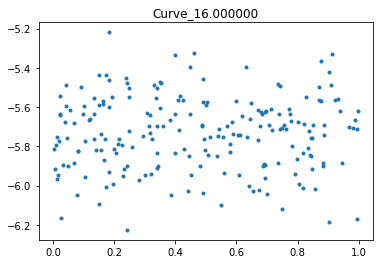

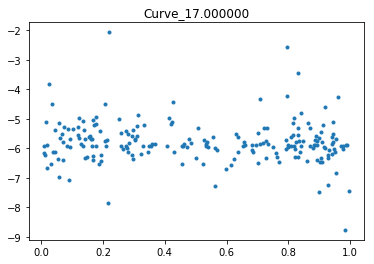

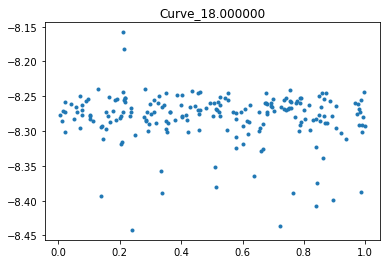

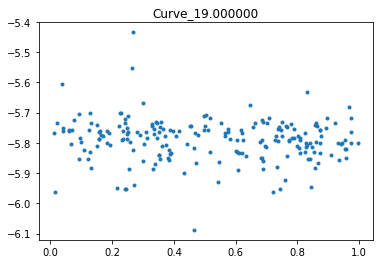

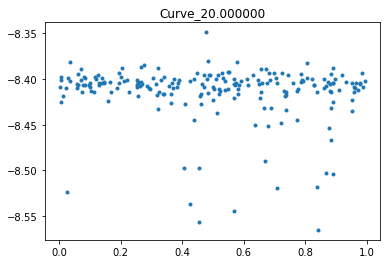

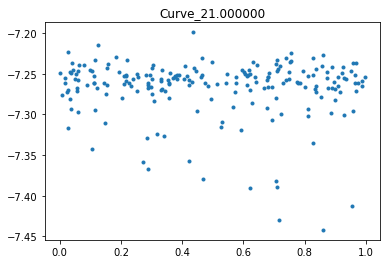

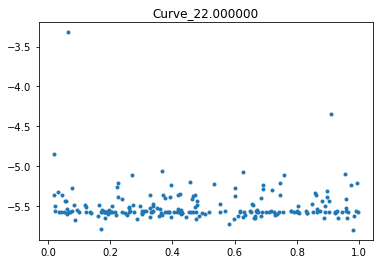

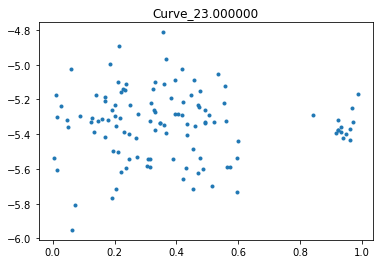

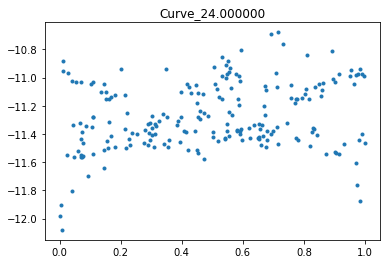

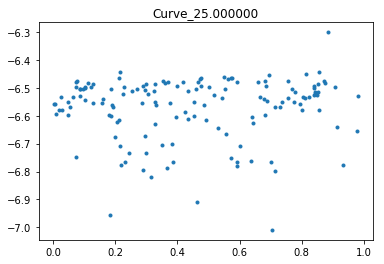

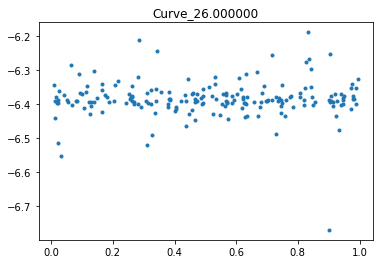

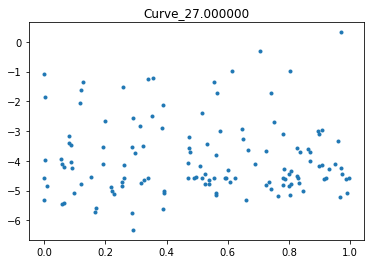

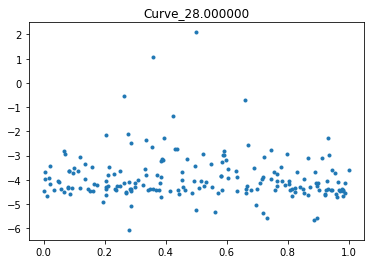

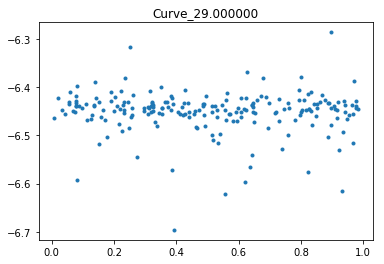

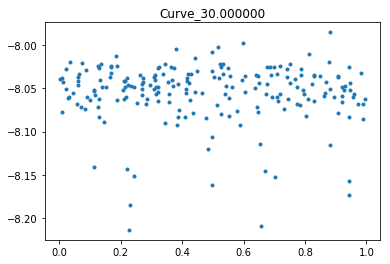

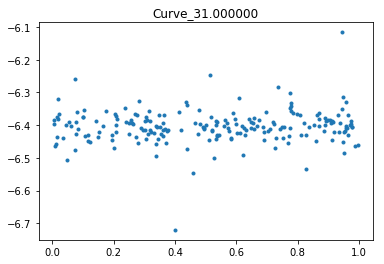

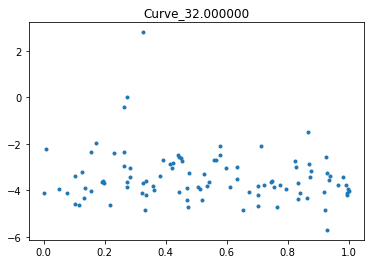

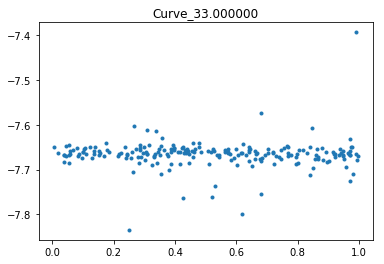

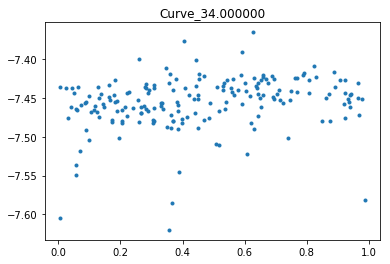

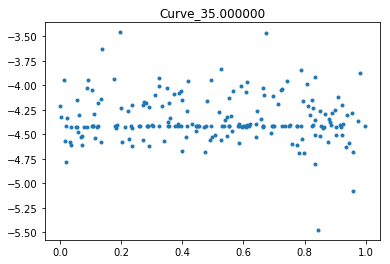

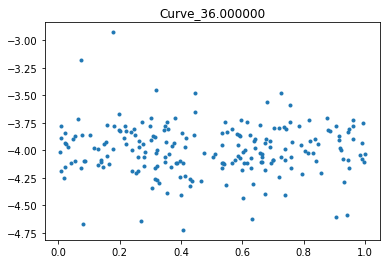

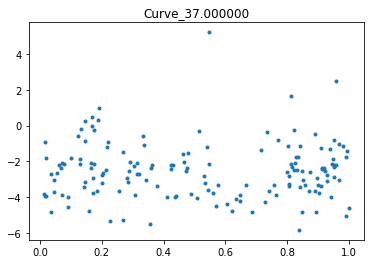

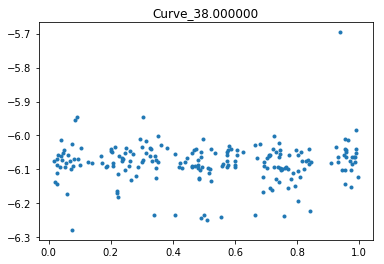

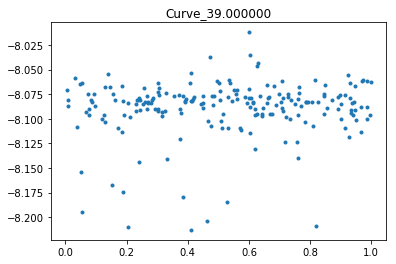

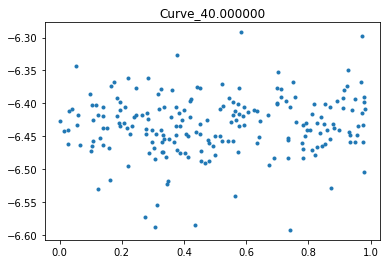

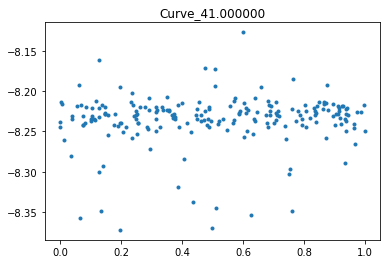

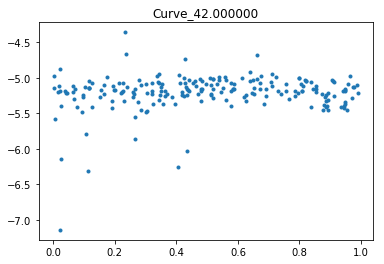

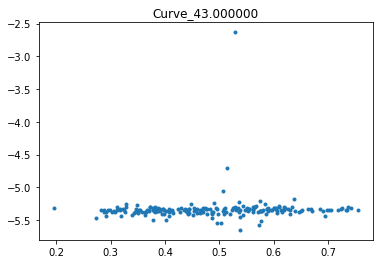

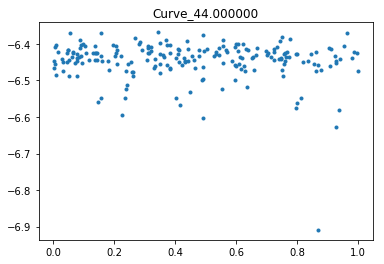

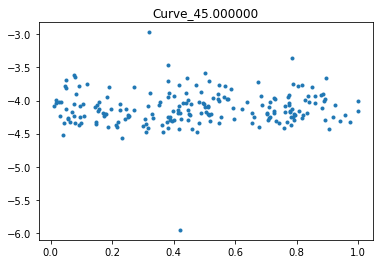

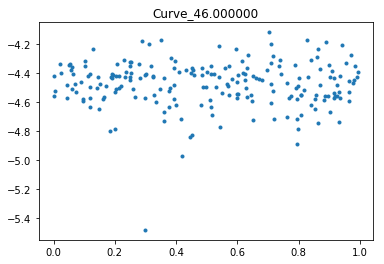

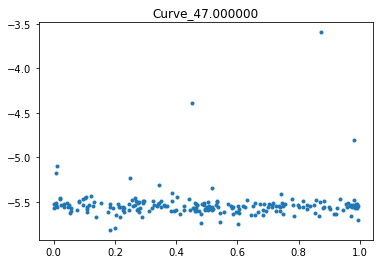

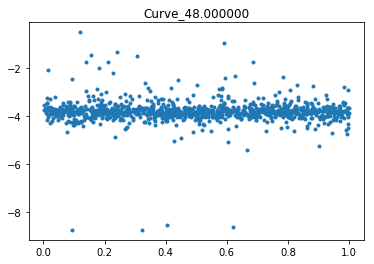

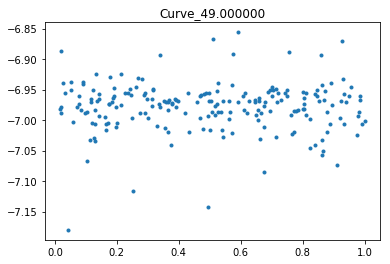

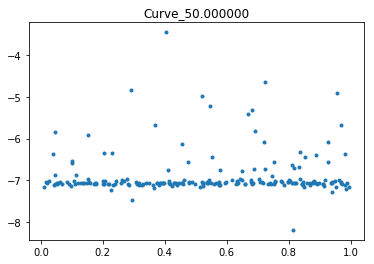

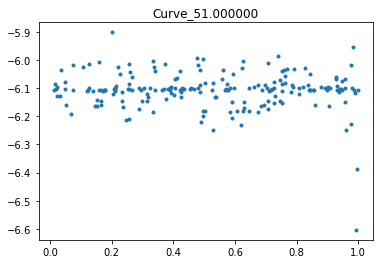

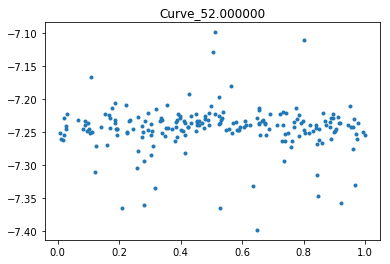

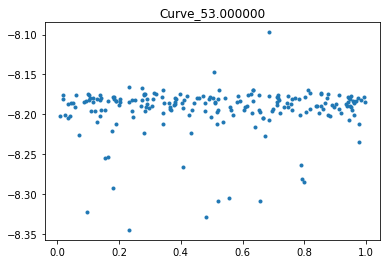

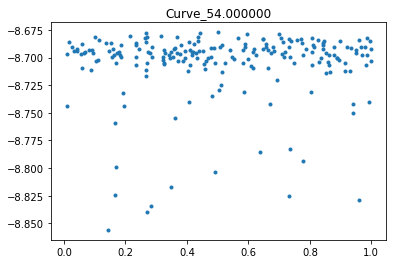

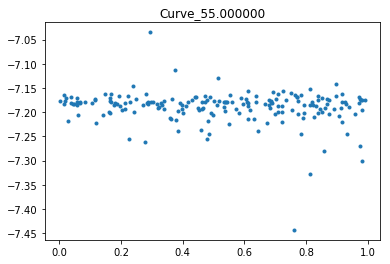

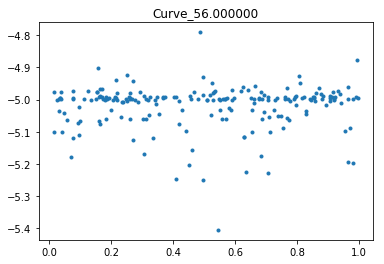

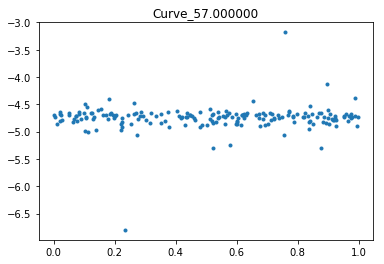

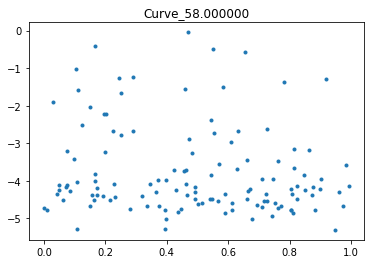

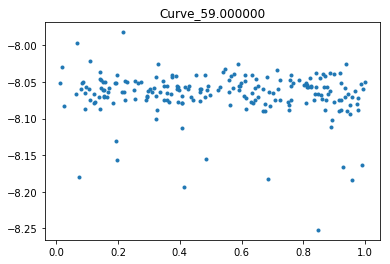

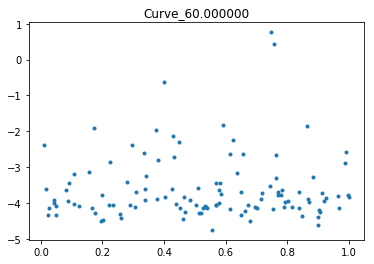

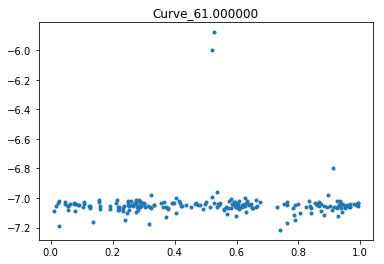

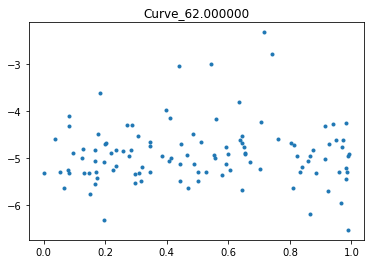

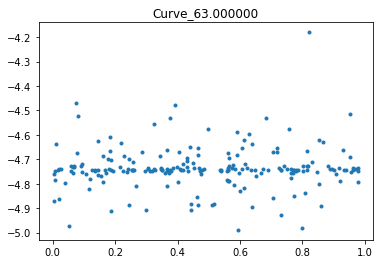

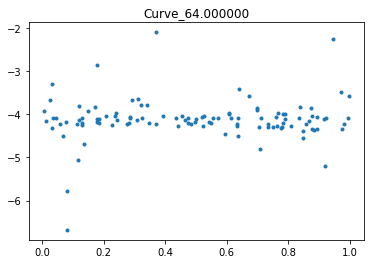

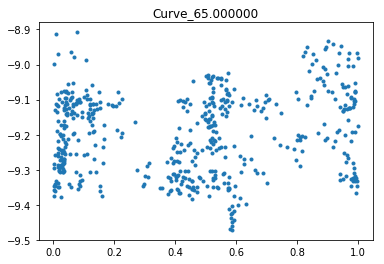

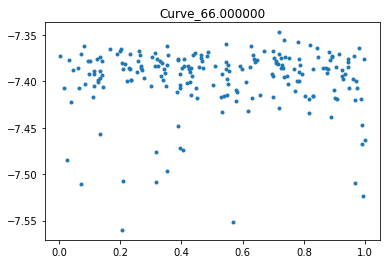

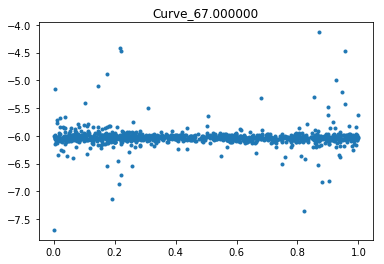

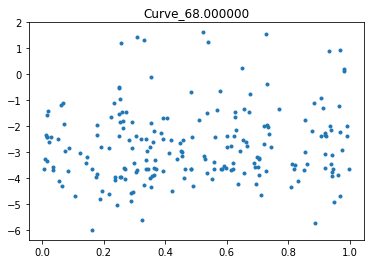

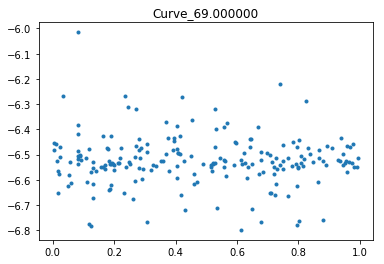

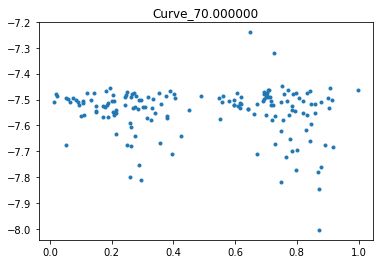

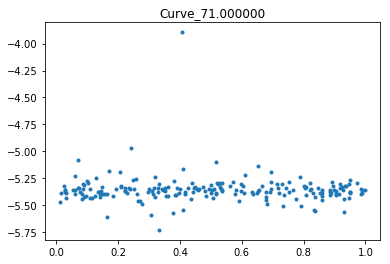

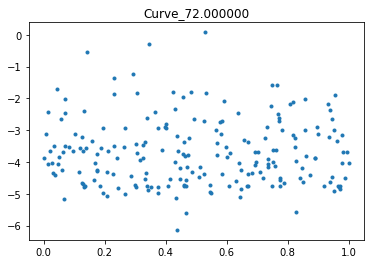

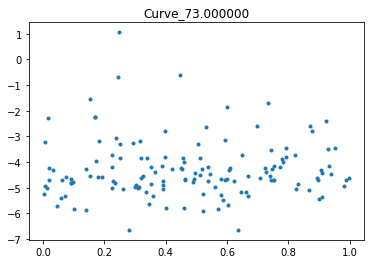

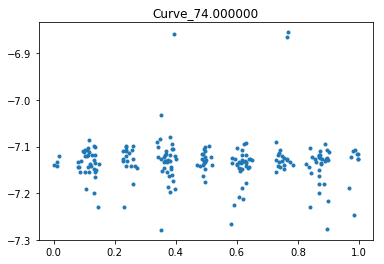

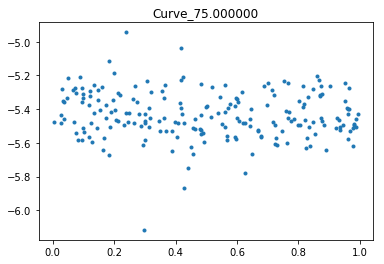

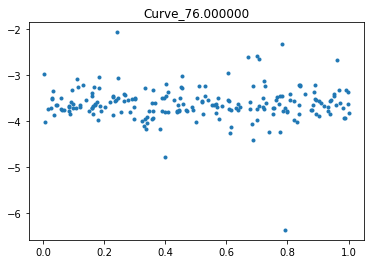

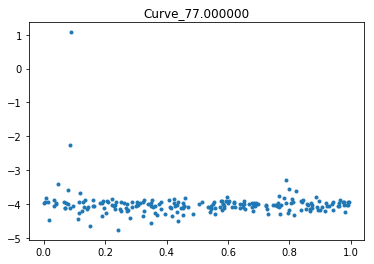

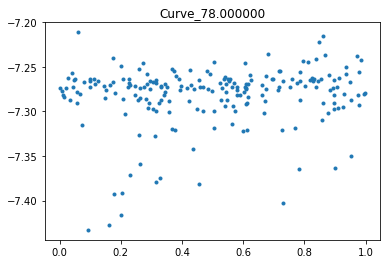

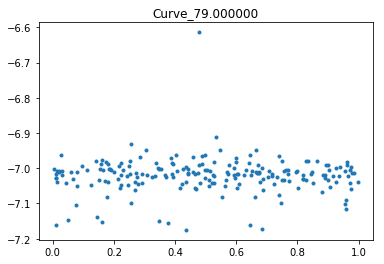

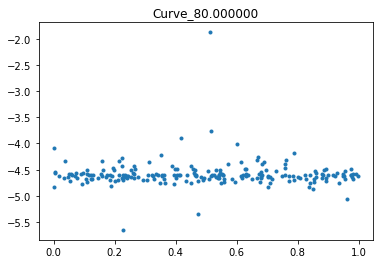

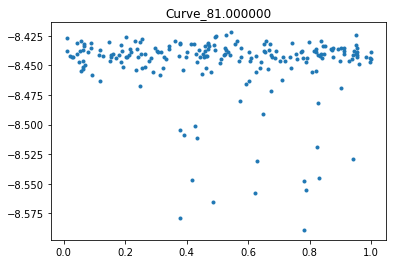

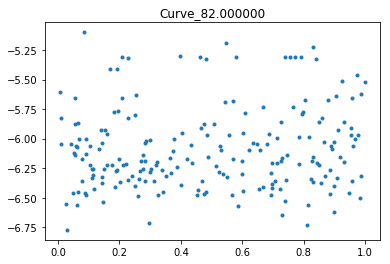

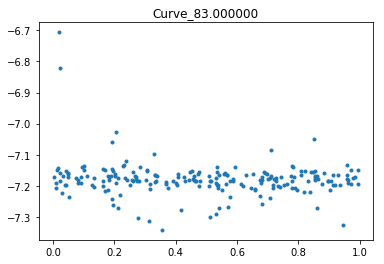

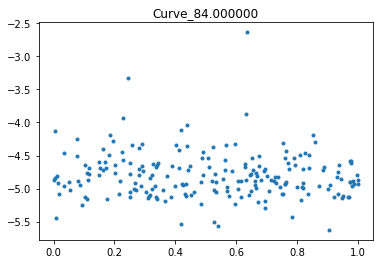

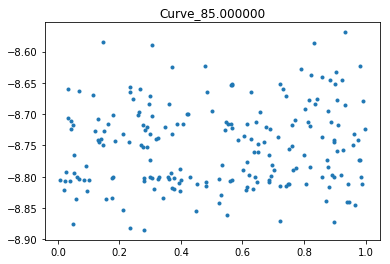

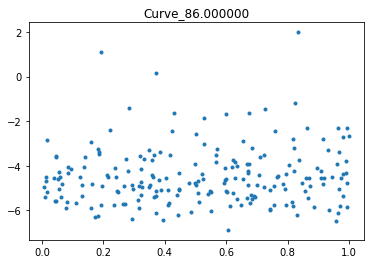

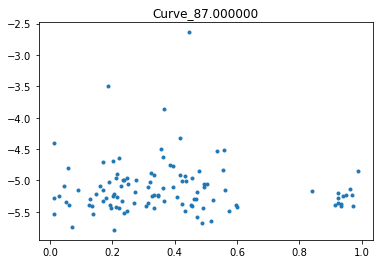

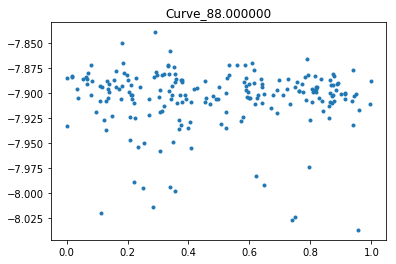

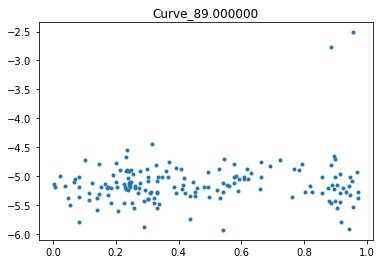

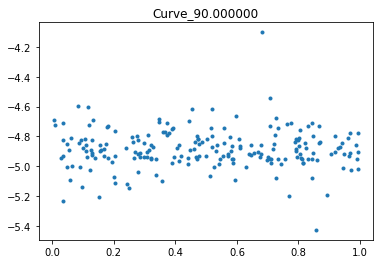

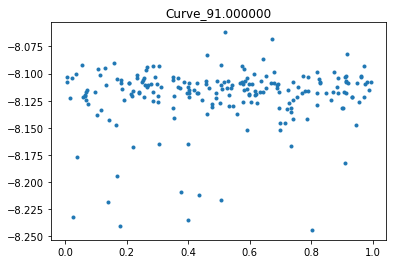

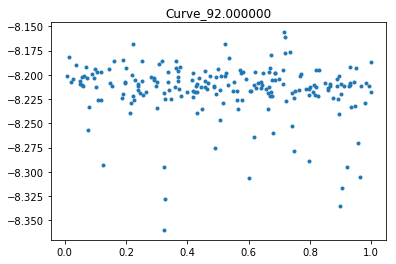

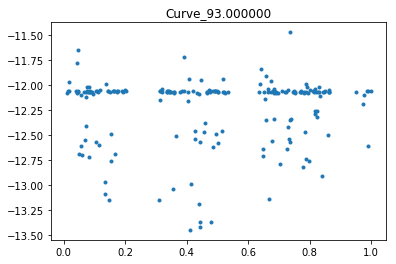

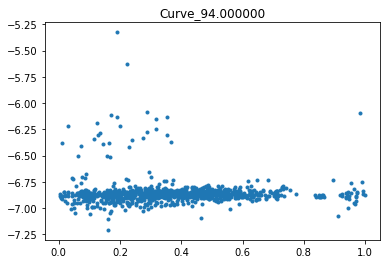

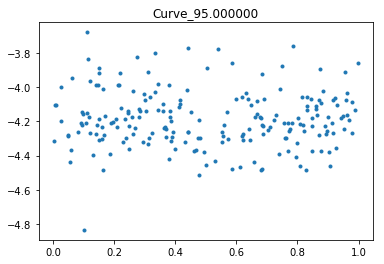

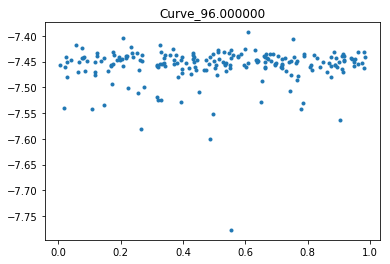

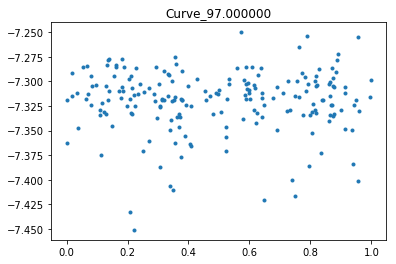

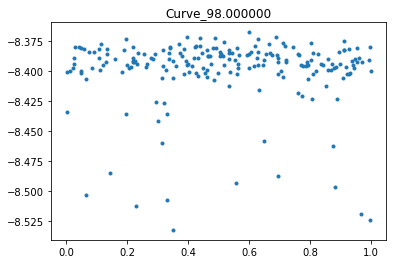

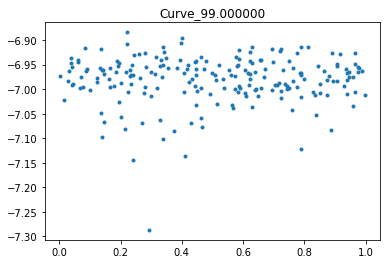

In [5]:
for i in range(0,100):
    lc = Table.read(macho_data[i], data_start=2,format='ascii')
    time = lc['col1']
    rMag = lc['col7']
    m = rMag > -20
    
    period, power = LombScargle(time[m], rMag[m]).autopower(minimum_frequency = 0.2, maximum_frequency = 4)
    
    best_frequency = period[np.argmax(power)]
    period_d = best_frequency
    foldTimes = time[m] / period_d  
    foldTimes = foldTimes % 1   
    plt.plot(foldTimes,rMag[m],linestyle='none',marker='.') 
    plt.title('Curve_%f' %(i))
    plt.show() 

In [25]:
periodic = []

for i in range (0,500):
    lc = Table.read(macho_data[i], data_start=2,format='ascii')
    time = lc['col1']
    rMag = lc['col7']
    m = rMag > -20
    oMag = rMag[m]
    otime = time[m]

    lb= 0.2
    ub= 12
    nfreq=200000
    
    ofreq=np.linspace(lb, ub, nfreq)
    opower = LombScargle(otime, oMag).power(ofreq)

    power= opower[((ofreq%1)<0.95) & ((ofreq%1)>0.05)]
    freq= ofreq[((ofreq%1)<0.95) & ((ofreq%1)>0.05)]
        
    if np.max(power)>0.35:
        periodic.append(macho_data[i])

In [26]:
#len(periodic) -- 9    

9

In [38]:
non_varying = []

for i in range (0,50):
    lc = Table.read(macho_data[i], data_start=2,format='ascii')
    time = lc['col1']
    rMag = lc['col7']
    m = rMag > -20
    avmag = np.mean(rMag[m])
    error = np.std(rMag[m])
    chi2 = np.sum((rMag[m] - avmag)**2/(error**2))
    reduced_chi2 = (chi2)/(len(rMag[m])-1)

    if reduced_chi2 < 3:
        non_varying.append(macho_data[i])

In [51]:
#len(non_varying) -- 50
'''
for i in range (0,50):
    lc = Table.read(non_varying[i], data_start=2,format='ascii')
    time = lc['col1']
    rMag = lc['col7']
    m = rMag > -20
    plt.plot(time[m], rMag[m],'.')
    plt.title('Curve_%f' %(i))
    plt.show() 
'''
lc = Table.read(non_varying[16], data_start=2,format='ascii')
time = lc['col1']
rMag = lc['col7']
m = rMag > -20
avmag = np.mean(rMag[m])
error = np.std(rMag[m])
chi2 = np.sum((rMag[m] - avmag)**2/(error**2))
reduced_chi2 = (chi2)/(len(rMag[m])-1)

print (avmag)
print (error)
print (reduced_chi2)

-5.73416666667
0.184455031096
1.00492610837


attempt at getting a straight line fit

In [55]:
y_int = np.mean(rMag[m])
# test for straight line
lc = Table.read(macho_data[40], data_start=2,format='ascii')
time = lc['col1']
rMag = lc['col7']
m = rMag > -20
lc

col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34,col35,col36
float64,int64,str4,int64,str7,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int64,float64,int64,int64,float64,float64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int64,float64,int64,int64
473.7748,5558,West,150,0x101bf,1.0151,-6.416,0.021,-77,1,65,54,0,0,5,1005.2,246.0,2150,4.204,7425,1,-6.002,0.023,-78,1,65,62,0,0,11,269.8,1000.1,1313,4.371,7425,1
476.7656,5790,West,150,0x101bf,1.0151,-6.47,0.014,-81,1,50,79,0,0,5,995.9,230.2,1912,3.597,7425,1,-6.022,0.017,-74,1,43,83,0,0,11,254.4,991.0,1277,3.679,7425,1
481.7824,6008,West,150,0x101bf,1.03,-6.437,0.015,-78,1,48,81,0,0,5,998.3,242.6,1932,3.529,7425,1,-6.049,0.016,-86,1,39,83,0,0,11,266.6,993.4,1392,3.469,7425,1
485.7388,6201,West,150,0x101bf,1.0151,-6.409,0.013,-90,1,32,101,0,0,5,1009.0,234.0,2159,3.069,7425,1,-6.005,0.015,-94,1,25,87,0,0,11,257.5,1003.9,1546,3.106,7425,1
487.7776,6275,West,150,0x101bf,1.0433,-6.421,0.02,-58,1,67,54,0,0,5,989.7,250.8,2074,4.083,7425,1,-6.003,0.022,-58,1,58,79,0,0,11,274.2,984.9,1255,4.173,7425,1
488.7964,6368,West,150,0x101bf,1.0807,-6.46,0.027,-94,41,70,72,0,0,5,1018.8,257.0,3445,4.472,7425,1,-6.02,0.034,-98,5,68,83,0,0,11,280.7,1013.3,2941,4.668,7425,1
489.7588,6440,West,150,0x100bf,1.0282,-6.367,0.023,-87,41,45,80,0,0,5,1015.9,243.9,9461,3.392,7425,1,-5.933,0.037,-99,1,47,93,0,0,11,266.9,1010.6,11903,3.41,7425,1
494.7746,6623,West,150,0x101bf,1.0694,-6.376,0.069,32,41,77,89,0,0,5,1016.0,253.7,40956,4.721,7425,1,-5.933,0.089,0,1,71,95,0,0,11,277.0,1010.6,34071,4.64,7425,1
497.7656,6792,West,150,0x101bf,1.0678,-6.46,0.094,-88,5,116,32,0,0,4,11.3,253.7,2990,7.014,7425,1,-6.082,0.084,-88,5,108,66,0,0,11,276.5,1029.6,2382,7.119,7425,1


Test for each light curve that is potentially periodic

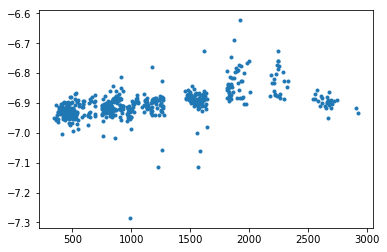

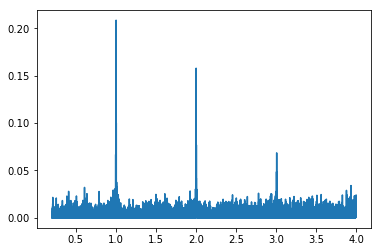

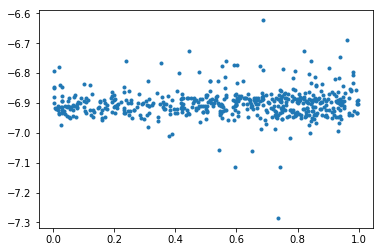

1.0030835992357883
0.2083950700440428
0.005258017284101265
38.894193483963036


In [13]:
lc = Table.read(macho_data[1737], data_start=2,format='ascii')
time = lc['col1']
rMag = lc['col7']
m = rMag > -20
plt.plot(time[m], rMag[m],'.')
plt.show()

# plot lomb-scargle

m = rMag > -20
period, power = LombScargle(time[m], rMag[m]).autopower(minimum_frequency = 0.2, maximum_frequency = 4)
plt.plot(period, power)
plt.show()

# find best period
best_frequency = period[np.argmax(power)]
period_d = best_frequency
 
# fold on best period

foldTimes = time[m] / period_d  
foldTimes = foldTimes % 1   
plt.plot(foldTimes,rMag[m],linestyle='none',marker='.')  
plt.show()

# find out the power of best frequency

print (best_frequency)
best_frequency_power = LombScargle(time[m], rMag[m]).power(best_frequency)
print (best_frequency_power)

#from standard deviation of the powers, how good is this best frequency?

standard_dev_power = np.std(power)
print (standard_dev_power)
mean = np.mean(power)
sigma_off = (best_frequency_power - mean) /standard_dev_power
print (sigma_off)

gaussian fit

Fitted mean =  -6.90586179617
Fitted standard deviation =  0.0343753299363


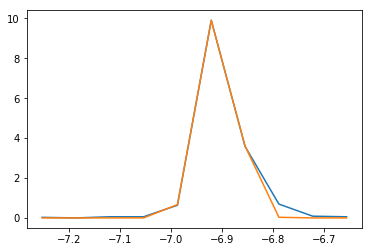

In [14]:
hist, bin_edges = np.histogram(rMag[m], density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [1., 0., 1.]

coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)

# Get the fitted curve
hist_fit = gauss(bin_centres, *coeff)

plt.plot(bin_centres, hist, label='Test data')
plt.plot(bin_centres, hist_fit, label='Fitted data')

# Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
print ('Fitted mean = ', coeff[1])
print ('Fitted standard deviation = ', coeff[2])

plt.show()

#2.9 sigma is normal distribution

In [17]:
#power associated with best frequency

# LombScargle(time[m], rMag[m]).power(best_frequency)

<Quantity 0.08342512921260298>

In [44]:
# power = LombScargle(time[m], rMag[m]).power(period)
# mean_1 = np.mean(power)
# mean_1

<Quantity 0.009948174717616613>

In [70]:
n = 1.0055
if 1.005 > best_frequency > 1.002:
    print ("yes")
else:
    print ("no")
 4790

yes


find highest standard deviation in "good periods" list

In [113]:
stand_dev = []
for i in range (0,50):
    lc = Table.read(periods[i], data_start=2,format='ascii')
    time = lc['col1']
    rMag = lc['col7']
    m = rMag > -20
    period, power = LombScargle(time[m], rMag[m]).autopower(minimum_frequency = 0.2, maximum_frequency = 4)
    best_frequency = period[np.argmax(power)]
    best_frequency_power = LombScargle(time[m], rMag[m]).power(best_frequency)
    standard_dev_power = np.std(power)
    mean = np.mean(power)
    sigma_off = (best_frequency_power - mean) /standard_dev_power
    stand_dev.append('curve_%f' %(i), sigma_off)
    # figure out how to write data into a list and have a tile for the file -- like fits.writeto('name', data)

TypeError: append() takes exactly one argument (2 given)

In [1]:
lc = Table.read(periods[7], data_start=2,format='ascii')
time = lc['col1']
rMag = lc['col7']
m = rMag > -20
plt.plot(time[m], rMag[m],'.')
plt.title("Light Curve")
plt.xlabel("Time (days)")
plt.ylabel("Magnitude (m)")
plt.show()

# plot lomb-scargle

m = rMag > -20
period, power = LombScargle(time[m], rMag[m]).autopower(minimum_frequency = 0.2, maximum_frequency = 4)
plt.plot(period, power)
#plt.errorbar(period, power, linestyle='None', marker='^')
plt.title("Lomb Scargle Periodigram")
plt.xlabel("Period (days)")
plt.ylabel("Power")
plt.show()

# find best period
best_frequency = period[np.argmax(power)]
period_d = best_frequency

# find how good that period is
best_frequency_power = LombScargle(time[m], rMag[m]).power(best_frequency)
 
# fold on best period

foldTimes = time[m] / period_d  
foldTimes = foldTimes % 1   
plt.plot(foldTimes,rMag[m],linestyle='none',marker='.')  
plt.title("Folded Period")
plt.xlabel("Time (days)")
plt.ylabel("Magnitude (m)")
plt.show()

print (best_frequency)
standard_dev_power = np.std(power)
print (standard_dev_power)
mean = np.mean(power)
sigma_off = (best_frequency_power - mean) /standard_dev_power
print (sigma_off)

NameError: name 'Table' is not defined

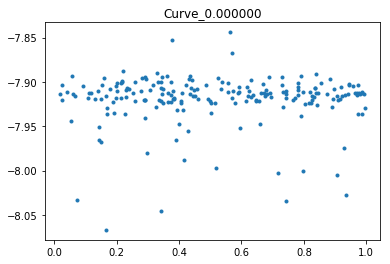

1.6750791122251276
0.08310878520800476
0.010157977727819881
7.1428328915699115


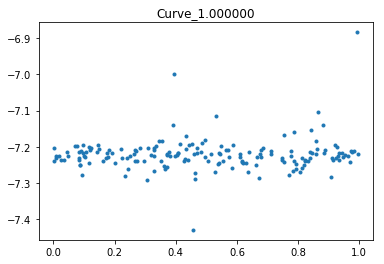

3.3108366460856296
0.08162594702431797
0.010425960342686964
6.75484359040677


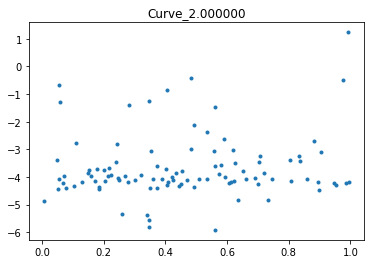

1.1949404946443711
0.2282161169529646
0.021400264067435105
9.645307511016767


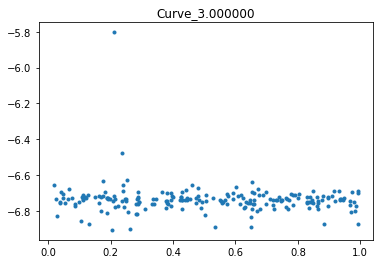

2.2195616593162253
0.05781453881071686
0.007201055393783433
6.7425876835721255


In [22]:
for i in range(0,4):
    lc = Table.read(periods[i], data_start=2,format='ascii')
    time = lc['col1']
    rMag = lc['col7']
    m = rMag > -20
    
    period, power = LombScargle(time[m], rMag[m]).autopower(minimum_frequency = 0.1, maximum_frequency = 4)
    
    best_frequency = period[np.argmax(power)]
    period_d = best_frequency
    foldTimes = time[m] / period_d  
    foldTimes = foldTimes % 1   
    plt.plot(foldTimes,rMag[m],linestyle='none',marker='.') 
    plt.title('Curve_%f' %(i))
    plt.show()
    
    print (best_frequency)
    best_frequency_power = LombScargle(time[m], rMag[m]).power(best_frequency)
    print (best_frequency_power)

#from standard deviation of the powers, how good is this best frequency

    standard_dev_power = np.std(power)
    print (standard_dev_power)
    mean = np.mean(power)
    sigma_off = (best_frequency_power - mean) /standard_dev_power
    print (sigma_off)

Code for plot titles/axes:

In [62]:
# LIGHT CURVE
# plt.title("Light Curve")
# plt.xlabel("Time (days)")
# plt.ylabel("Magnitude (m)")
# plt.show()

# LOMB SCARGLE
# plt.title("Lomb Scargle Periodigram")
# plt.xlabel("Period (days)")
# plt.ylabel("Power")
# plt.show()

# FOLDED PERIOD
# plt.title("Folded Period")
# plt.xlabel("Time (days)")
# plt.ylabel("Magnitude (m)")
# plt.show()

# Quasar 1

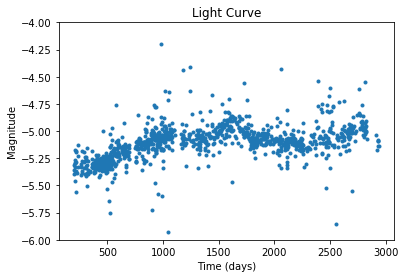

In [5]:
lc = Table.read(macho_data[2594], data_start=2,format='ascii')
time = lc['col1']
rMag = lc['col7']
error = lc['col8']
m = (rMag > -20) & (error<2)
plt.plot(time[m], rMag[m],'.')
plt.ylim(-6, -4)
plt.title("Light Curve")
plt.xlabel("Time (days)")
plt.ylabel("Magnitude")
plt.show()

# Quasar 2

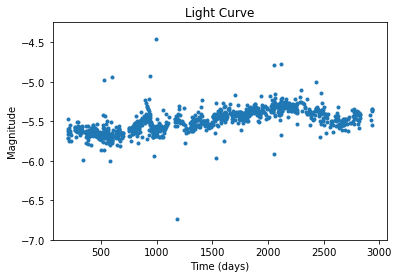

In [6]:
lc = Table.read(macho_data[4523], data_start=2,format='ascii')
time = lc['col1']
rMag = lc['col7']
error = lc['col8']
m = (rMag > -20) & (error<2)
plt.plot(time[m], rMag[m],'.')
plt.title("Light Curve")
plt.xlabel("Time (days)")
plt.ylabel("Magnitude")
plt.ylim(-7, -4.25)
plt.show()


# Quasar 3

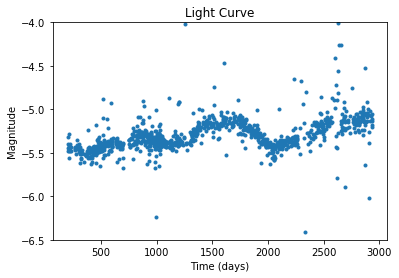

In [7]:
# QUASAR 3
lc = Table.read(macho_data[1050], data_start=2,format='ascii')
time = lc['col1']
rMag = lc['col7']
error = lc['col8']
m = (rMag > -20) & (error<2)
plt.plot(time[m], rMag[m],'.')
plt.ylim(-6.5, -4)
plt.title("Light Curve")
plt.xlabel("Time (days)")
plt.ylabel("Magnitude")
plt.show()

# Quasar 4

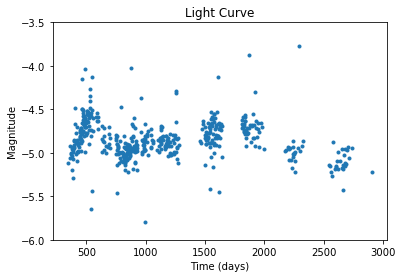

In [8]:
lc = Table.read(macho_data[510], data_start=2,format='ascii')
time = lc['col1']
rMag = lc['col7']
error = lc['col8']
m = (rMag > -20) & (error<2)
plt.plot(time[m], rMag[m],'.')
plt.ylim(-6, -3.5)
plt.title("Light Curve")
plt.xlabel("Time (days)")
plt.ylabel("Magnitude")
plt.show()


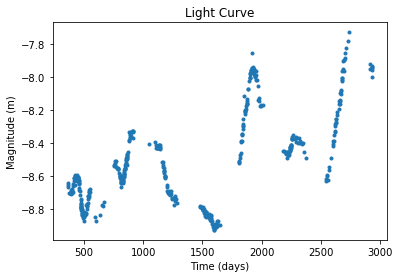

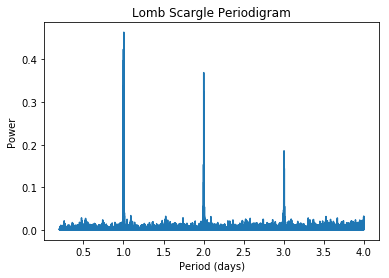

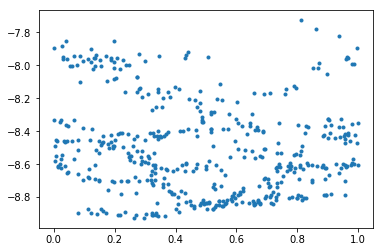

1.0038650509505154
0.4636326221791318
0.011853451319752385
38.75245111593233


In [86]:
lc = Table.read(macho_data[2149], data_start=2,format='ascii')
time = lc['col1']
rMag = lc['col7']
#py.figure(figsize = (3, 3))
m = rMag > -20
plt.plot(time[m], rMag[m],'.')
plt.title("Light Curve")
plt.xlabel("Time (days)")
plt.ylabel("Magnitude (m)")
plt.show()

# plot lomb-scargle

m = rMag > -20
period, power = LombScargle(time[m], rMag[m]).autopower(minimum_frequency = 0.2, maximum_frequency = 4)
plt.plot(period, power)
plt.title("Lomb Scargle Periodigram")
plt.xlabel("Period (days)")
plt.ylabel("Power")
plt.show()

# find best period
best_frequency = period[np.argmax(power)]
period_d = best_frequency
 
# fold on best period

foldTimes = time[m] / period_d  
foldTimes = foldTimes % 1   
plt.plot(foldTimes,rMag[m],linestyle='none',marker='.')  
plt.show()

#find out the power of best frequency

print (best_frequency)
best_frequency_power = LombScargle(time[m], rMag[m]).power(best_frequency)
print (best_frequency_power)

#from standard deviation of the powers, how good is this best frequency

standard_dev_power = np.std(power)
print (standard_dev_power)
mean = np.mean(power)
sigma_off = (best_frequency_power - mean) /standard_dev_power
print (sigma_off)

